<a href="https://colab.research.google.com/github/HenriqueCCdA/BC_DS_Projeto1/blob/main/notebooks/Producao_hospitalar_com_correcao_monetaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correção monetaria da produção hospitalar usando o IPCA 

## Funções de apoio

In [35]:
def plot(ylim, regiao):

  locs = []
  labels = []
  for i, data in enumerate(prod_hosp_usaveis.T.index[0:-1]):
   if data.endswith('Jan'):
     locs.append(i) 
     labels.append(data)

  estados = prod_hosp_usaveis_corr_monetaria.query("Regiao == @regiao").index

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6), sharey=True) 
  plt.subplots_adjust(wspace=0.05)
  
  for estado in estados:
    ax1 = prod_hosp_usaveis_corr_monetaria.T[estado].drop("Regiao").plot(ax = ax1)
    ax2 = prod_hosp_usaveis.T[estado].drop("Regiao").plot(ax = ax2)

  fig.suptitle(y=1.0,t = f"Serie histórica dos valores gastos em saude da Regiao {regiao}", 
                         fontsize=20)

  ax1.set_xticks(locs)
  ax1.set_xticklabels(labels, rotation = -45)
  
  ax2.set_xticks(locs)
  ax2.set_xticklabels(labels, rotation = -45)

  ax1.set_ylabel("Gastos (R$ Milhoes)", fontsize=14)

  ax1.set_xlim(0,137)
  ax2.set_xlim(0,137)
  ax1.set_ylim(0,ylim)

  ax1.grid(color='silver', linestyle='--')
  ax2.grid(color='silver', linestyle='--')

  ax1.set_title("Com correção monetaria", fontsize=16)
  ax2.set_title("Sem correção monetaria", fontsize=16)

  ax2.legend(ncol = 2, labels = [ name[2:] for name in estados],
            loc = "upper right",            
            facecolor="silver",
            title = "Estados", 
            fontsize=12)
  plt.show()

In [7]:
def correcao_monetaria(valor_passado, ipcaOuinpc, data_passada, data_correcao):
  '''
  -------------------------------------------------------------------------
  Name: correcao monetaria
  -------------------------------------------------------------------------
  @param valor_passado: valor na data passa
  @param ipcaOuinpc   : tabela com os indices IPCA ou INPC
  @param data_passada : data passada  ano/mes
  @param data_correcao: data correcao ano/mes
  '''

  i_passado = ipcaOuinpc.loc[data_passada][0]
  i_atual = ipcaOuinpc.loc[data_correcao][0]

  return  round(valor_passado * (i_atual/i_passado), 2)

## Importação das bibliotecas utilizadas

1. Panda
2. Matplotlib

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [9]:
milhao = 1.e6

In [10]:
# pandas configuracao
pd.options.display.float_format  ="{:,.2f}".format

## Leitura dos dados do IPCA

In [11]:
uri = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto1/main/Dados/IBGE/ipca.csv"
ipca = pd.read_csv(uri).set_index("ANO/MES")

In [12]:
ipca.head()

,NÚMERO ÍNDICE
ANO/MES,
1994/JAN,141.31
1994/FEV,198.22
1994/MAR,282.96
1994/ABR,403.73
1994/MAI,581.49


## Leitura dos de produção hospitalar

In [13]:
uri = "producao_hospitalar.csv"

prod_hosp = pd.read_csv(uri, 
                    encoding="ISO-8859-1",
                    skiprows = 3, sep=";", 
                    skipfooter=12,
                    thousands=".",
                    decimal=",",
                    engine="python"  )

In [14]:
prod_hosp_usaveis = prod_hosp
prod_hosp_usaveis.set_index("Unidade da Federação", inplace=True)
prod_hosp_usaveis = prod_hosp_usaveis.select_dtypes(float)
prod_hosp_usaveis = prod_hosp_usaveis.loc[:, "2009/Jan":"2020/Jun"]/milhao

In [15]:
prod_hosp_usaveis.head()

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,2.46,2.41,3.30,3.18,3.10,2.62,2.89,2.96,2.86,3.02,2.87,2.86,3.02,3.11,3.73,3.62,3.84,3.49,3.70,3.55,3.71,3.57,3.52,3.51,3.35,3.42,3.74,4.08,3.76,3.74,3.44,3.78,3.31,3.45,3.47,3.20,3.54,3.50,3.86,3.64,...,7.00,6.51,6.46,6.43,6.54,6.63,6.28,6.88,6.43,6.55,6.79,6.22,7.11,6.69,7.63,6.53,7.23,7.31,6.69,6.70,6.94,6.53,6.73,6.93,7.25,7.38,7.59,6.88,7.19,7.18,6.73,7.17,7.18,6.94,6.68,6.78,5.81,6.01,7.28,9.00
12 Acre,1.63,1.56,1.87,1.81,1.97,1.63,1.55,1.31,1.07,1.73,1.89,1.70,1.81,1.58,1.91,1.96,1.92,1.75,1.72,1.85,1.94,1.98,1.91,1.90,2.09,1.87,2.12,2.02,2.37,2.07,2.15,2.24,2.14,2.10,2.07,2.08,2.11,1.88,2.32,2.12,...,2.74,2.12,2.37,2.55,2.70,2.55,2.54,2.54,2.38,1.97,2.27,2.11,2.32,2.16,2.45,2.35,2.53,2.30,2.24,2.39,1.89,1.74,1.99,1.71,1.88,2.27,2.32,2.47,2.72,2.23,2.25,2.52,2.44,2.26,2.51,2.28,2.23,2.04,2.25,3.08
13 Amazonas,6.57,6.46,7.05,6.29,6.63,7.35,7.30,7.10,6.93,7.09,6.61,6.34,7.19,6.40,7.93,7.79,7.66,7.15,7.07,7.24,7.44,7.58,7.27,7.14,7.48,7.23,8.44,8.15,7.80,7.64,7.68,7.54,7.49,7.74,8.19,6.62,7.64,6.86,8.59,8.11,...,10.40,10.57,10.62,10.56,11.08,10.52,10.69,10.55,10.32,10.51,11.13,9.83,11.31,11.23,11.88,11.38,12.02,12.71,11.84,12.53,10.94,11.07,11.90,10.98,12.53,12.60,12.84,12.08,12.95,12.81,11.82,12.65,11.38,11.60,12.35,11.77,11.51,12.93,15.61,14.58
14 Roraima,0.87,0.81,1.05,1.04,1.02,1.01,1.03,1.14,1.17,1.13,1.20,1.16,1.20,1.10,1.37,1.30,1.50,1.42,1.42,1.55,1.45,1.30,1.14,1.10,1.20,0.93,0.99,1.06,1.25,1.35,1.24,1.22,1.33,1.39,1.22,1.19,1.19,1.20,1.30,1.18,...,1.97,1.80,2.09,2.04,2.03,2.16,2.04,2.01,1.99,2.01,2.05,1.85,1.98,2.01,2.10,2.22,2.12,2.49,2.12,2.20,1.87,1.81,1.98,1.86,2.12,2.04,2.13,2.01,2.15,2.38,2.28,2.36,2.35,2.19,2.33,2.23,2.08,1.73,2.23,2.56
15 Pará,19.74,17.98,22.11,21.52,20.77,20.60,20.55,21.84,21.14,21.56,20.87,19.82,20.59,19.98,22.36,21.08,22.28,21.11,20.37,21.68,21.15,20.51,20.61,20.40,21.80,20.38,22.77,21.23,21.53,20.36,19.71,21.05,20.89,20.79,20.81,19.86,20.71,19.67,22.33,20.87,...,26.15,23.51,26.02,24.34,24.53,25.64,24.99,25.37,25.30,24.14,25.66,23.44,26.16,26.80,27.20,25.99,25.97,26.84,25.77,27.70,25.21,24.88,26.41,24.36,25.45,23.77,23.70,21.54,27.74,27.75,27.80,28.00,26.99,26.91,28.40,26.61,26.70,22.47,34.32,32.06


## Correção monetaria dos gasto pelo IPCA

In [16]:
columns = prod_hosp_usaveis.columns 
prod_hosp_usaveis_corr_monetaria = prod_hosp_usaveis.copy()

for coluna in columns:
  prod_hosp_usaveis_corr_monetaria[coluna] = prod_hosp_usaveis_corr_monetaria[coluna].apply(lambda x : correcao_monetaria(x ,ipca, coluna.upper(), "2020/DEZ"))

In [17]:
index = prod_hosp_usaveis_corr_monetaria.index

regiao = {'1': 'Norte',
          '2': 'Nordeste',
          '3': 'Sudeste',
          '4': 'Sul',
          '5': 'Centro-Oeste'}

prod_hosp_usaveis_corr_monetaria['Regiao'] = [regiao[estado[0]] for estado in index ]
prod_hosp_usaveis['Regiao'] = [regiao[estado[0]] for estado in index ]

## Comparação dos gastos da região **Norte** com e sem **correção monetaria** 

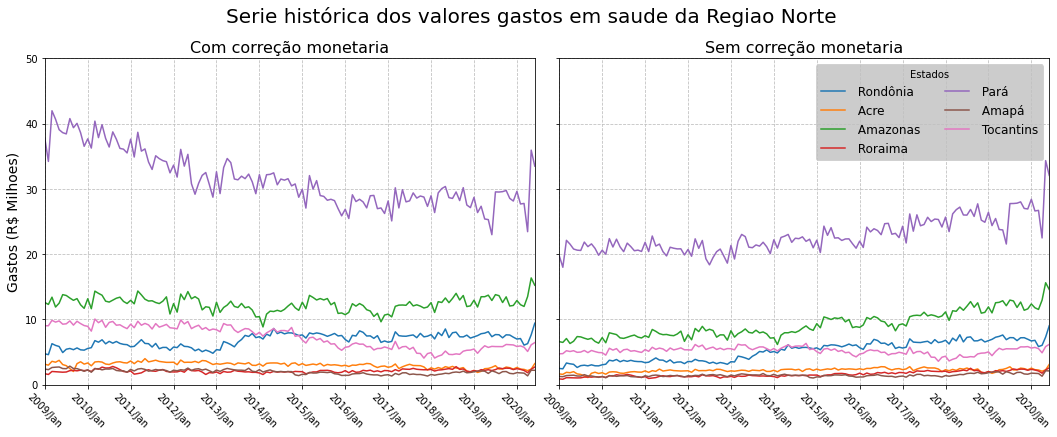

In [29]:
plot(ylim = 50, regiao = "Norte")

Os estados do **Pará** e **Tocantins** apresentam uma queda dos gasto reais (corrigido).

## Comparação dos gastos da região **Sul** com e sem **correção monetaria** 

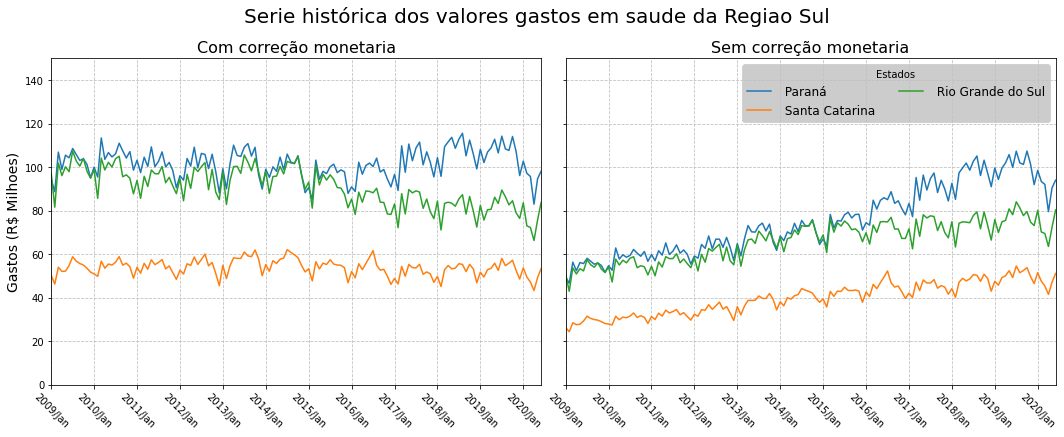

In [30]:
plot(ylim = 150, regiao = "Sul")

O estado do **Rio Grande do Sul** apresenta uma queda dos gasto reais (corrigido).


## Comparação dos gastos da região **Nordeste** com e sem **correção monetaria** 

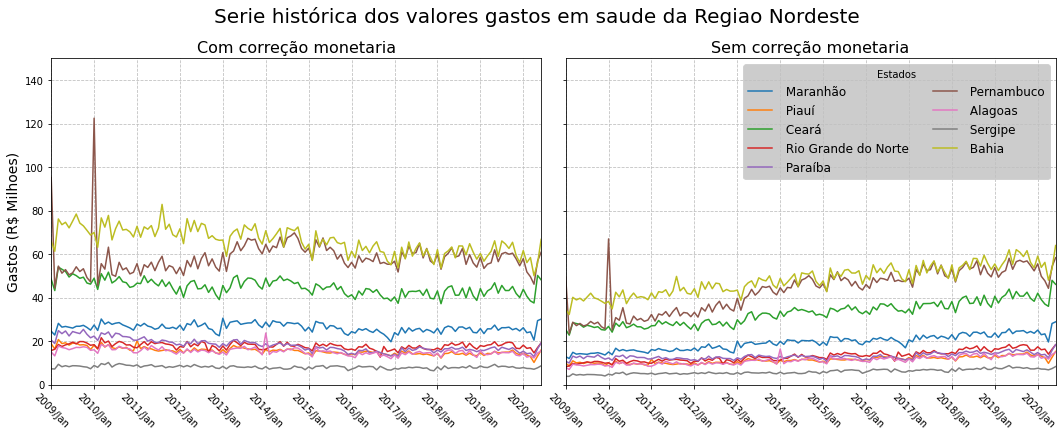

In [32]:
plot(ylim = 150, regiao = "Nordeste")

O estado da **Bahia** apresenta uma queda dos gasto reais (corrigido).


## Comparação dos gastos da região **Sudeste** com e sem **correção monetaria** 

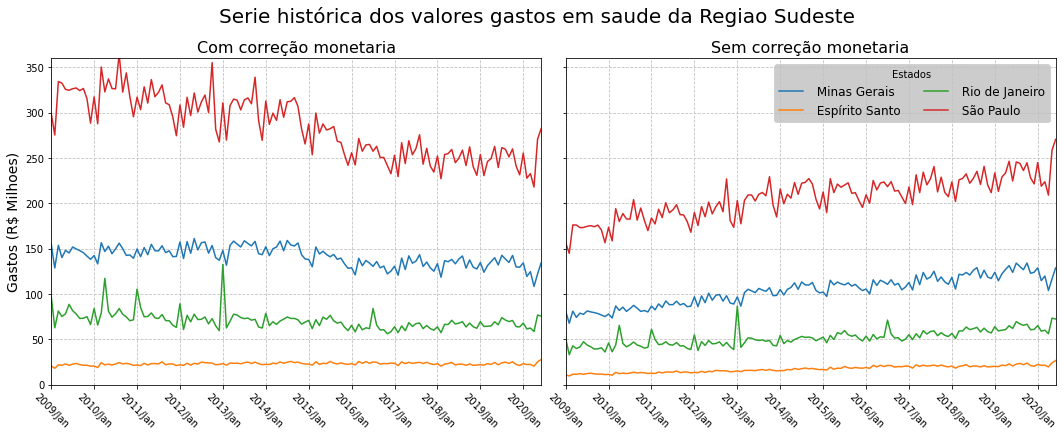

In [33]:
plot(ylim = 360, regiao = "Sudeste")

O estado de **São Paulo** apresenta uma queda dos gasto reais (corrigido). 


## Comparação dos gastos da região **Centro-Oeste** com e sem **correção monetaria** 

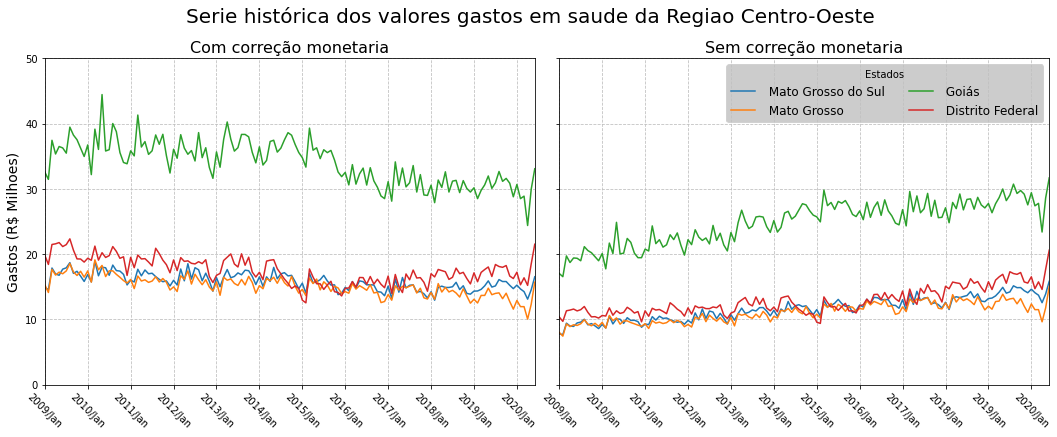

In [34]:
plot(ylim = 50, regiao = "Centro-Oeste")

O estado de **Goiás** apresenta uma queda dos gasto reais (corrigido). Os demias estados da região mantem os gastos relativamente constantes ao longo dos anos.



---



---



---



## Variação dos gastos

Para quantifica melhor as variacoes de gatos foram escolhidos dois periodos de de 3 anos:

*   P1 de Janeiro de 2009 até Dezembro de 2011 - 36 meses (3 anos)
*   P2 de Janeiro de 2017 até Dezembro de 2019 - 36 meses (3 anos)

A variação de gastos foi obitida pela diferença da soma dos gastos desse dos periodos.

$var =\sum{gastos}_{P_2} - \sum{gastos}_{P_1}$

A variação foi normalizado pela soma de gatos do periodo P1

$varNorm = \frac{\sum{gastos}_{P_2} - \sum{gastos}_{P_1}}{\sum{gastos}_{P_1}}$


---



---



1. Obtendo a soma de gatos dos periodos P1 e P2

In [114]:
soma_de_gatos_periodo_2009_2011 = prod_hosp_usaveis_corr_monetaria.loc[:,'2009/Jan':'2011/Dez'].sum(axis=1)
soma_de_gatos_periodo_2017_2019 = prod_hosp_usaveis_corr_monetaria.loc[:,'2017/Jan':'2019/Dez'].sum(axis=1)

2. Criando um novo dataFrame com soma de gatos

In [115]:
d = {'soma_2009_2011': soma_de_gatos_periodo_2009_2011,
     'soma_2017_2019': soma_de_gatos_periodo_2017_2019}

soma_de_gastos = pd.DataFrame(data = d)

In [116]:
soma_de_gastos.head()

,soma_2009_2011,soma_2017_2019
Unidade da Federação,,
11 Rondônia,211.96,270.30
12 Acre,119.07,91.83
13 Amazonas,464.25,450.66
14 Roraima,76.02,82.18
15 Pará,"1,337.00","1,015.24"


3. Caluculando a variação e a variação normalizada

In [119]:
soma_de_gastos["variacao"] = soma_de_gastos["soma_2017_2019"] - soma_de_gastos["soma_2009_2011"]
soma_de_gastos["variacao_normalizada"] = soma_de_gastos["variacao"]/soma_de_gastos["soma_2009_2011"]

4. Ordenando do menor para o maior

In [120]:
soma_de_gastos = soma_de_gastos.sort_values('variacao_normalizada')

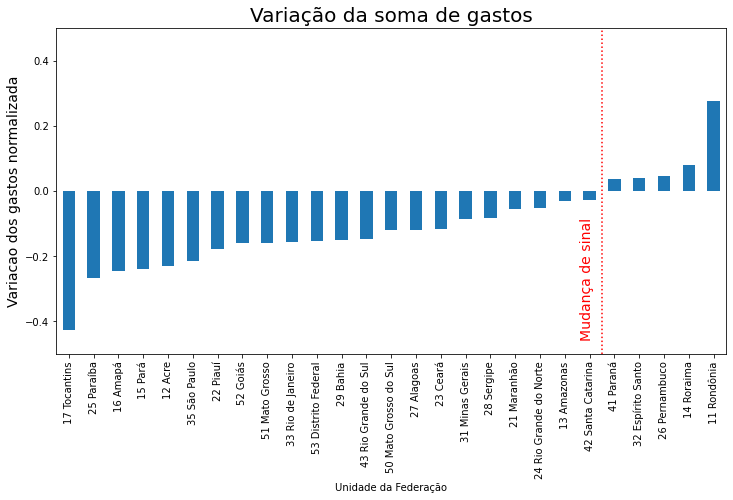

In [146]:
ax = soma_de_gastos['variacao_normalizada'].plot(kind = 'bar', figsize = (12, 6))

ax.set_ylabel("Variacao dos gastos normalizada", fontsize=14)
ax.set_title("Variação da soma de gastos", fontsize=20)

ax.annotate(s = 'Mudança de sinal', xy = (20.6, -0.45), fontsize=14, rotation=90, color='red')
ax.vlines(x=21.5, ymax=1, ymin=-1, ls =":", color='red')

ax.set_ylim(-0.5,0.5)
plt.show()


Valores negativos significam que houve uma redução de gatos com saude. Já valores positivos houve um aumento. Pode-se observar que a maioria dos estados houve uma redução de gasto com saude.



---



---



---

